In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
img_path = './data/'
def describe_files(img_path):
    print('# File sizes')
    for f in os.listdir(img_path):
        if not os.path.isdir(img_path + f):
            print(f.ljust(30) + str(round(os.path.getsize(img_path + f) / 1000000, 2)) + 'MB')
        else:
            sizes = [os.path.getsize(img_path+f+'/'+x)/1000000 for x in os.listdir(img_path + f)]
            print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
describe_files(img_path)

# File sizes
train-jpg_64                  0.47MB (5114 files)
train_v2.csv                  1.43MB
train-jpg                     634.68MB (40479 files)


In [2]:
df_train = pd.read_csv(img_path+'train_v2.csv')
df_train['split_tags'] = df_train['tags'].map(lambda row: row.split(" "))
df_train.head()

,image_name,tags,split_tags
0,train_0,haze primary,"[haze, primary]"
1,train_1,agriculture clear primary water,"[agriculture, clear, primary, water]"
2,train_2,clear primary,"[clear, primary]"
3,train_3,clear primary,"[clear, primary]"
4,train_4,agriculture clear habitation primary road,"[agriculture, clear, habitation, primary, road]"


In [3]:
labels = df_train['tags'].apply(lambda x: x.split(' '))
labels = df_train['tags'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1

data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-label-dist')

Image: 89 tags: clear primary


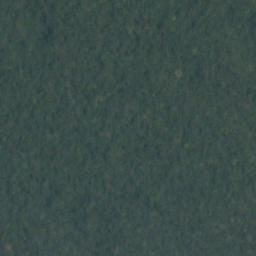

In [6]:
import cv2
from IPython.display import Image 
img_path = './data/train-jpg/'
# im_num = np.random.randint(0,len(df_train))
im_num = np.random.randint(0,500)
print('Image:',im_num, 'tags:',df_train.loc[im_num].tags)
Image(filename=img_path+df_train.loc[im_num].image_name+'.jpg')

In [7]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
im_data = mpimg.imread(img_path+df_train.loc[im_num].image_name+'.jpg')
print (im_data.shape)

(256, 256, 4)


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



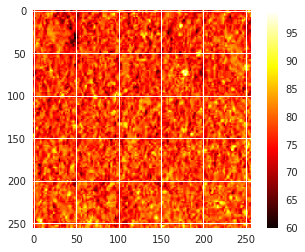

In [8]:
plt.imshow(im_data[:,:,1], cmap='hot');
plt.colorbar()

#### Resize images
usando código de ayuda del repositorio pix2pix-tensorflow de github

`python process.py --input_dir data/train-jpg \
--operation resize \
--size 64 \
--output_dir data/train-jpg_64`

In [9]:
# resized files:
describe_files('./data/')

# File sizes
train-jpg_64                  0.47MB (5114 files)
train_v2.csv                  1.43MB
train-jpg                     634.68MB (40479 files)


/notebooks/1_Kaggle_amaz/helper.py:108: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



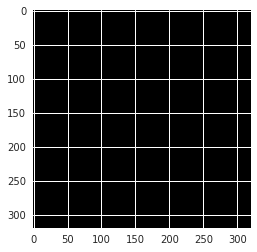

In [10]:
%matplotlib inline
import os
import helper
from glob import glob
from matplotlib import pyplot
img_path = './data/train-jpg_64/'
show_n_images = 25
images = helper.get_batch(glob(os.path.join(img_path, '*.png'))[:show_n_images], 64, 64, mode='RGB')
pyplot.imshow(helper.images_square_grid(images, mode='RGB'));

In [11]:
def model_inputs(image_width, image_height, image_channels, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, (None), name='learning_rate')
    return inputs_real, inputs_z, learning_rate